In [35]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt

In [36]:
train_df = pd.read_csv("/home/marilin/xAutoML-Project1/fjodor/project-1/data/clean/train_clean.csv", delimiter = ";")
train_df.head()

,aluminium,ammonium,boron,chloride,coli-like-bacteria-colilert,coli-like-bacteria,colony-count-at-22-c,color-pt-co-unit,color-pt/co-scale,electrical-conductivity,...,odour-dilution-level,oxidability,smell-ball-units,sodium,sulphate,taste-ball-units,taste-dilution-degree,turbidity-ntu,ph,compliance
0,5.0,0.05,0.200,23.0,0.0,0.0,5.0,1.8,2.1,474.0,...,1.0,1.3,0.0,34.8,10.0,0.0,1.0,1.6,7.80,0
1,5.0,0.05,0.200,23.0,0.0,0.0,0.0,5.0,0.0,465.0,...,1.0,1.3,0.0,34.8,10.0,0.0,1.0,1.0,7.30,0
2,5.0,0.05,0.200,23.0,0.0,0.0,0.0,5.0,0.0,448.0,...,1.0,1.3,0.0,34.8,10.0,0.0,1.0,1.0,7.80,0
3,5.0,0.09,0.641,23.0,0.0,0.0,15.0,5.0,4.0,978.0,...,1.0,1.3,1.0,34.8,10.0,1.0,1.0,0.5,7.44,0
4,5.0,0.06,0.200,23.0,0.0,0.0,1.0,6.6,2.1,446.0,...,1.0,1.3,0.0,34.8,10.0,0.0,1.0,0.2,7.70,0


In [37]:
test_df = pd.read_csv("/home/marilin/xAutoML-Project1/fjodor/project-1/data/clean/test_clean.csv", delimiter = ";")
test_df.head()

,aluminium,ammonium,boron,chloride,coli-like-bacteria-colilert,coli-like-bacteria,colony-count-at-22-c,color-pt-co-unit,color-pt/co-scale,electrical-conductivity,...,odour-dilution-level,oxidability,smell-ball-units,sodium,sulphate,taste-ball-units,taste-dilution-degree,turbidity-ntu,ph,compliance
0,5.0,0.08,0.071,130.0,0.0,0.0,12.0,5.0,11.7,716.0,...,1.0,0.45,0.0,62.5,12.4,0.0,1.0,1.18,8.17,0
1,5.0,0.08,0.106,28.0,0.0,0.0,5.0,5.0,7.7,996.0,...,1.0,1.60,0.0,29.5,14.0,0.0,1.0,3.90,7.83,1
2,5.0,0.05,0.106,112.0,0.0,0.0,5.0,5.0,4.0,734.0,...,2.0,1.60,0.0,29.5,14.0,0.0,2.0,1.40,7.50,0
3,5.0,0.05,0.072,248.0,0.0,0.0,82.0,5.0,5.0,1050.0,...,2.0,0.80,0.0,68.3,4.0,0.0,2.0,1.00,7.70,0
4,5.0,0.05,0.106,28.0,0.0,0.0,0.0,5.0,0.0,593.0,...,1.0,1.60,0.0,29.5,14.0,0.0,1.0,1.00,7.50,0


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aluminium                    880 non-null    float64
 1   ammonium                     880 non-null    float64
 2   boron                        880 non-null    float64
 3   chloride                     880 non-null    float64
 4   coli-like-bacteria-colilert  880 non-null    float64
 5   coli-like-bacteria           880 non-null    float64
 6   colony-count-at-22-c         880 non-null    float64
 7   color-pt-co-unit             880 non-null    float64
 8   color-pt/co-scale            880 non-null    float64
 9   electrical-conductivity      880 non-null    float64
 10  enterococci                  880 non-null    float64
 11  escherichia-coli-colilert    880 non-null    float64
 12  escherichia-coli             880 non-null    float64
 13  fluoride            

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aluminium                    378 non-null    float64
 1   ammonium                     378 non-null    float64
 2   boron                        378 non-null    float64
 3   chloride                     378 non-null    float64
 4   coli-like-bacteria-colilert  378 non-null    float64
 5   coli-like-bacteria           378 non-null    float64
 6   colony-count-at-22-c         378 non-null    float64
 7   color-pt-co-unit             378 non-null    float64
 8   color-pt/co-scale            378 non-null    float64
 9   electrical-conductivity      378 non-null    float64
 10  enterococci                  378 non-null    float64
 11  escherichia-coli-colilert    378 non-null    float64
 12  escherichia-coli             378 non-null    float64
 13  fluoride            

# Importing classifiers

Here we are testing 13 different classification algorithms. Algorithms were chosen so that they would all be different and work on classification task. 

Insipiration from here: https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods and here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [42]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [43]:
test_df.shape

(378, 28)

In [44]:
X_test = test_df.iloc[:,:27]
y_test = test_df['compliance']

X_train = train_df.iloc[:,:27]
y_train = train_df['compliance']

In [45]:
X_test

,aluminium,ammonium,boron,chloride,coli-like-bacteria-colilert,coli-like-bacteria,colony-count-at-22-c,color-pt-co-unit,color-pt/co-scale,electrical-conductivity,...,nitrite,odour-dilution-level,oxidability,smell-ball-units,sodium,sulphate,taste-ball-units,taste-dilution-degree,turbidity-ntu,ph
0,5.0,0.08,0.071,130.0,0.0,0.0,12.0,5.0,11.7,716.0,...,0.005,1.0,0.45,0.0,62.5,12.4,0.0,1.0,1.18,8.17
1,5.0,0.08,0.106,28.0,0.0,0.0,5.0,5.0,7.7,996.0,...,0.010,1.0,1.60,0.0,29.5,14.0,0.0,1.0,3.90,7.83
2,5.0,0.05,0.106,112.0,0.0,0.0,5.0,5.0,4.0,734.0,...,0.010,2.0,1.60,0.0,29.5,14.0,0.0,2.0,1.40,7.50
3,5.0,0.05,0.072,248.0,0.0,0.0,82.0,5.0,5.0,1050.0,...,0.010,2.0,0.80,0.0,68.3,4.0,0.0,2.0,1.00,7.70
4,5.0,0.05,0.106,28.0,0.0,0.0,0.0,5.0,0.0,593.0,...,0.010,1.0,1.60,0.0,29.5,14.0,0.0,1.0,1.00,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,5.0,0.05,0.106,28.0,0.0,0.0,300.0,5.0,3.0,30.0,...,0.010,2.0,1.60,0.0,29.5,14.0,0.0,2.0,1.00,6.70
374,5.0,0.05,0.106,28.0,0.0,0.0,25.0,5.0,14.0,1976.0,...,0.010,2.0,1.60,0.0,29.5,14.0,0.0,2.0,1.00,7.60
375,31.1,0.05,0.013,35.0,3.0,0.0,300.0,5.0,6.0,444.0,...,0.010,2.0,3.00,0.0,7.4,24.0,0.0,2.0,1.00,7.40
376,5.0,0.05,0.147,40.0,2.0,0.0,26.0,5.0,6.0,437.0,...,0.010,4.0,0.80,0.0,21.5,29.0,0.0,4.0,1.80,8.00


Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [46]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


[23:49:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:57] WARNING: /tmp/abs_40obctay9q/croots/recip

[23:50:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:36] WARNING: /tmp/abs_40obctay9q/croots/recip

[23:51:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:18] WARNING: /tmp/abs_40obctay9q/croots/recip

[23:51:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:57] WARNING: /tmp/abs_40obctay9q/croots/recip

In [47]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.28629398345947266


# Plot classifier results

First we plot all classifier scores over 100 iterations, to see how they vary.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

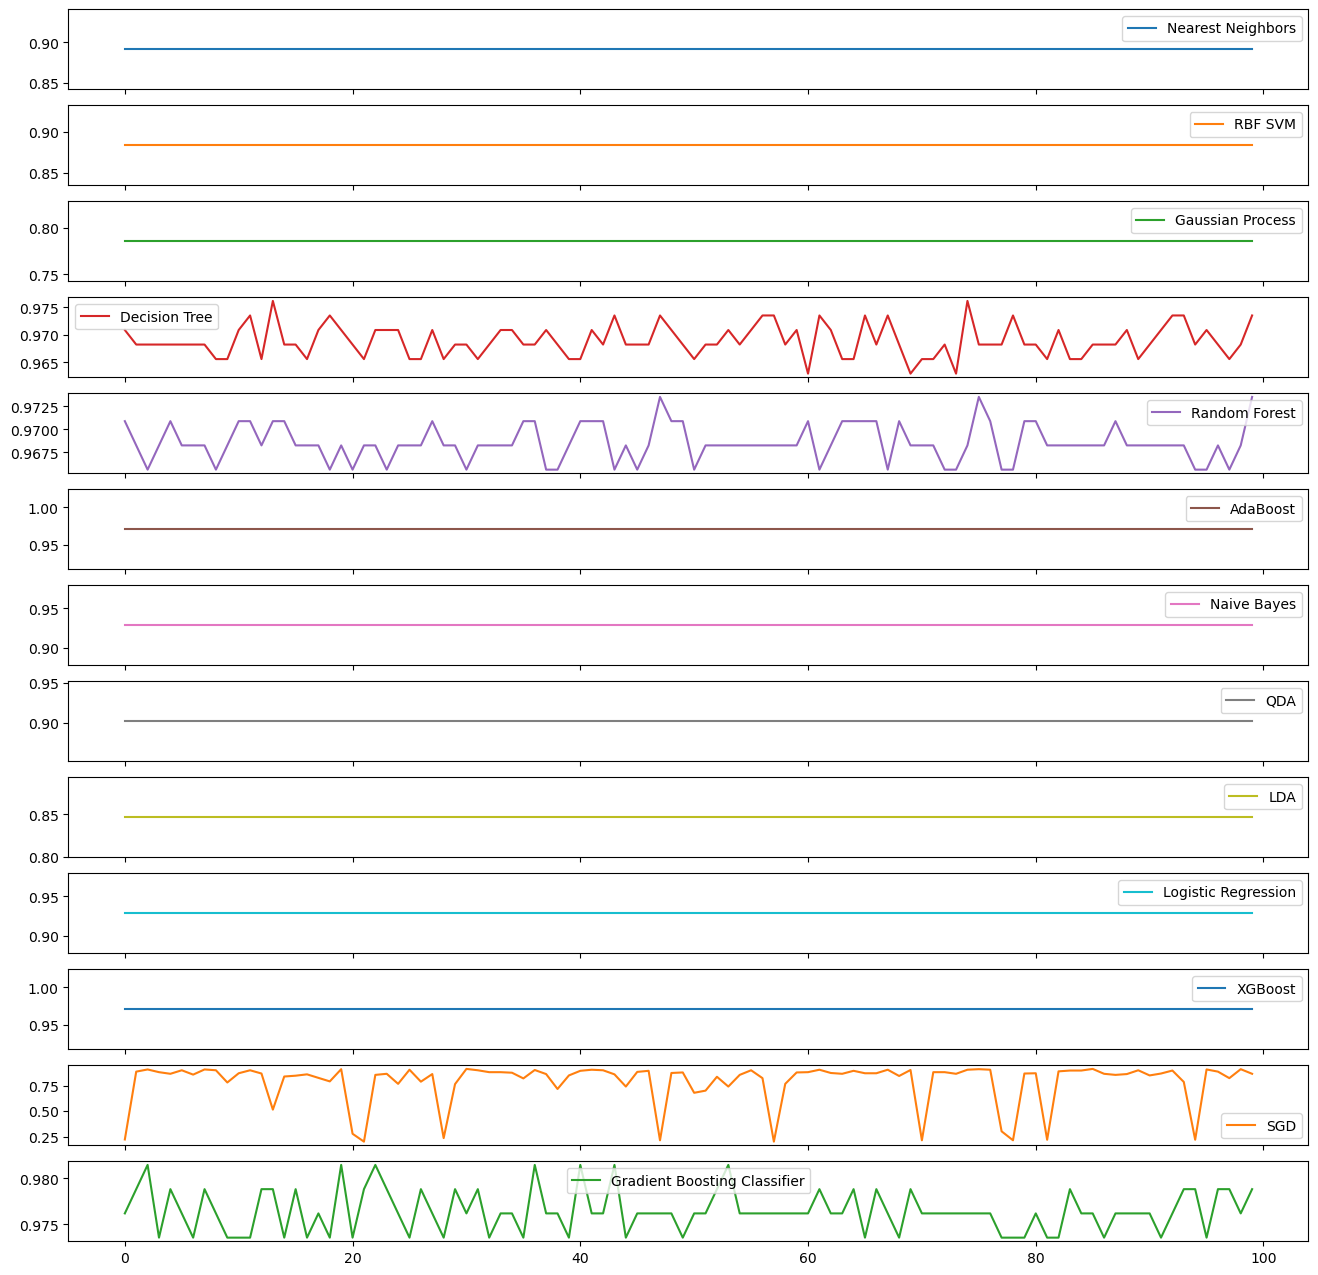

In [48]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

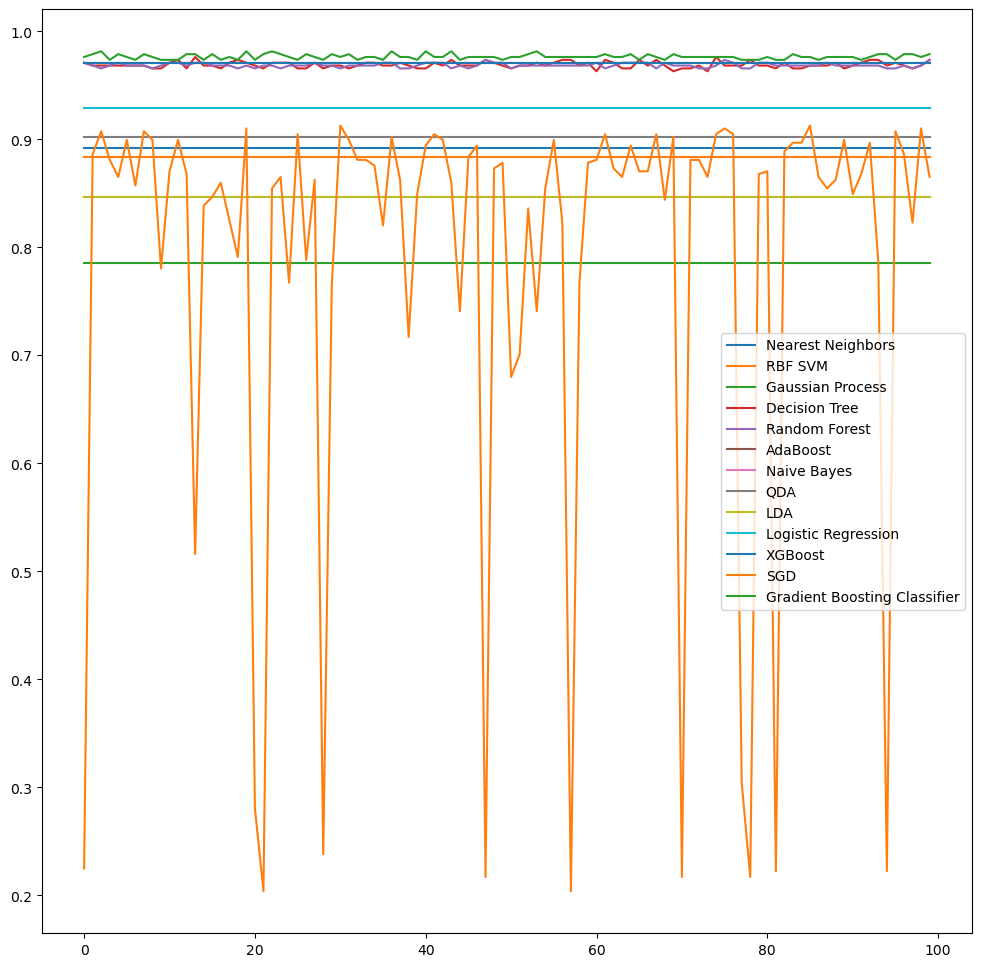

In [49]:
my_df.plot(figsize=(12,12))

<AxesSubplot:>

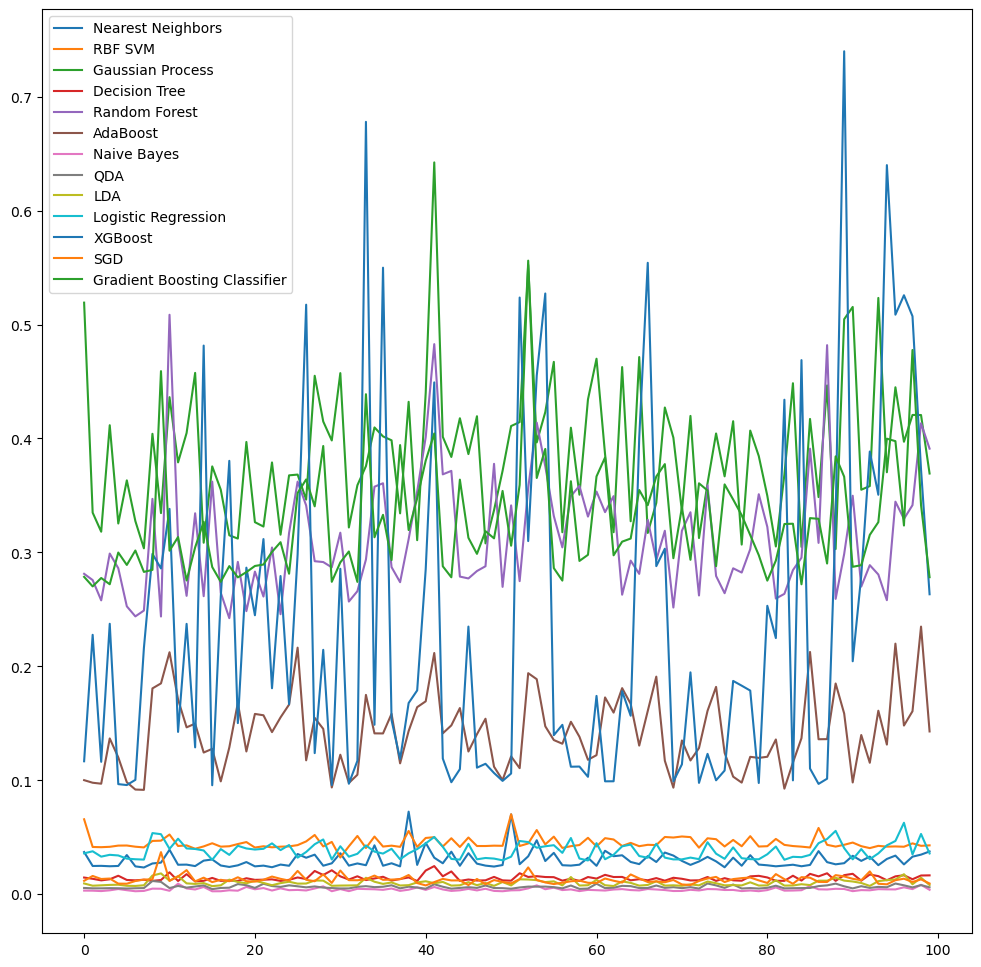

In [50]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [51]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
Gaussian Process,0.387740
Gradient Boosting Classifier,0.325696
Random Forest,0.312655
XGBoost,0.241243
AdaBoost,0.141901
RBF SVM,0.044918
Logistic Regression,0.038182
Nearest Neighbors,0.030089
Decision Tree,0.014281
SGD,0.012911


... median

In [52]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
Gaussian Process,0.384196
Gradient Boosting Classifier,0.312599
Random Forest,0.297011
XGBoost,0.181916
AdaBoost,0.138983
RBF SVM,0.042628
Logistic Regression,0.036680
Nearest Neighbors,0.027146
Decision Tree,0.013572
SGD,0.012330


# How long 100 iterations took per classifier

In [53]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
Gaussian Process,38.774006
Gradient Boosting Classifier,32.569558
Random Forest,31.265485
XGBoost,24.124254
AdaBoost,14.190059
RBF SVM,4.491793
Logistic Regression,3.818201
Nearest Neighbors,3.008856
Decision Tree,1.428127
SGD,1.291146


# Average accuracy of each classifier based on 100 runs

In [54]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Gradient Boosting Classifier,0.976455
AdaBoost,0.970899
XGBoost,0.970899
Decision Tree,0.968942
Random Forest,0.968519
Naive Bayes,0.928571
Logistic Regression,0.928571
QDA,0.902116
Nearest Neighbors,0.891534
RBF SVM,0.883598


# Median accuracy of each classifier based on 100 runs

In [27]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Gaussian Process,1.000000
Decision Tree,1.000000
Random Forest,1.000000
AdaBoost,1.000000
XGBoost,1.000000
Gradient Boosting Classifier,0.998864
Naive Bayes,0.935227
Logistic Regression,0.923864
Nearest Neighbors,0.910227
QDA,0.909091


## Results

When looking only accuracies, it seems that the best performing classifier is Gradient Boosting Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. But what about runtime?  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [30]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,Decision Tree,0.009861,5,1.000000,2,7
1,Naive Bayes,0.003486,1,0.935227,7,8
2,QDA,0.004508,2,0.909091,10,12
3,AdaBoost,0.110111,10,1.000000,3,13
4,XGBoost,0.107765,9,1.000000,4,13
5,Gaussian Process,0.443637,13,1.000000,1,14
6,Logistic Regression,0.022935,6,0.923864,8,14
7,LDA,0.006587,3,0.857955,12,15
8,Random Forest,0.209352,11,0.999989,5,16
9,Nearest Neighbors,0.037781,7,0.910227,9,16


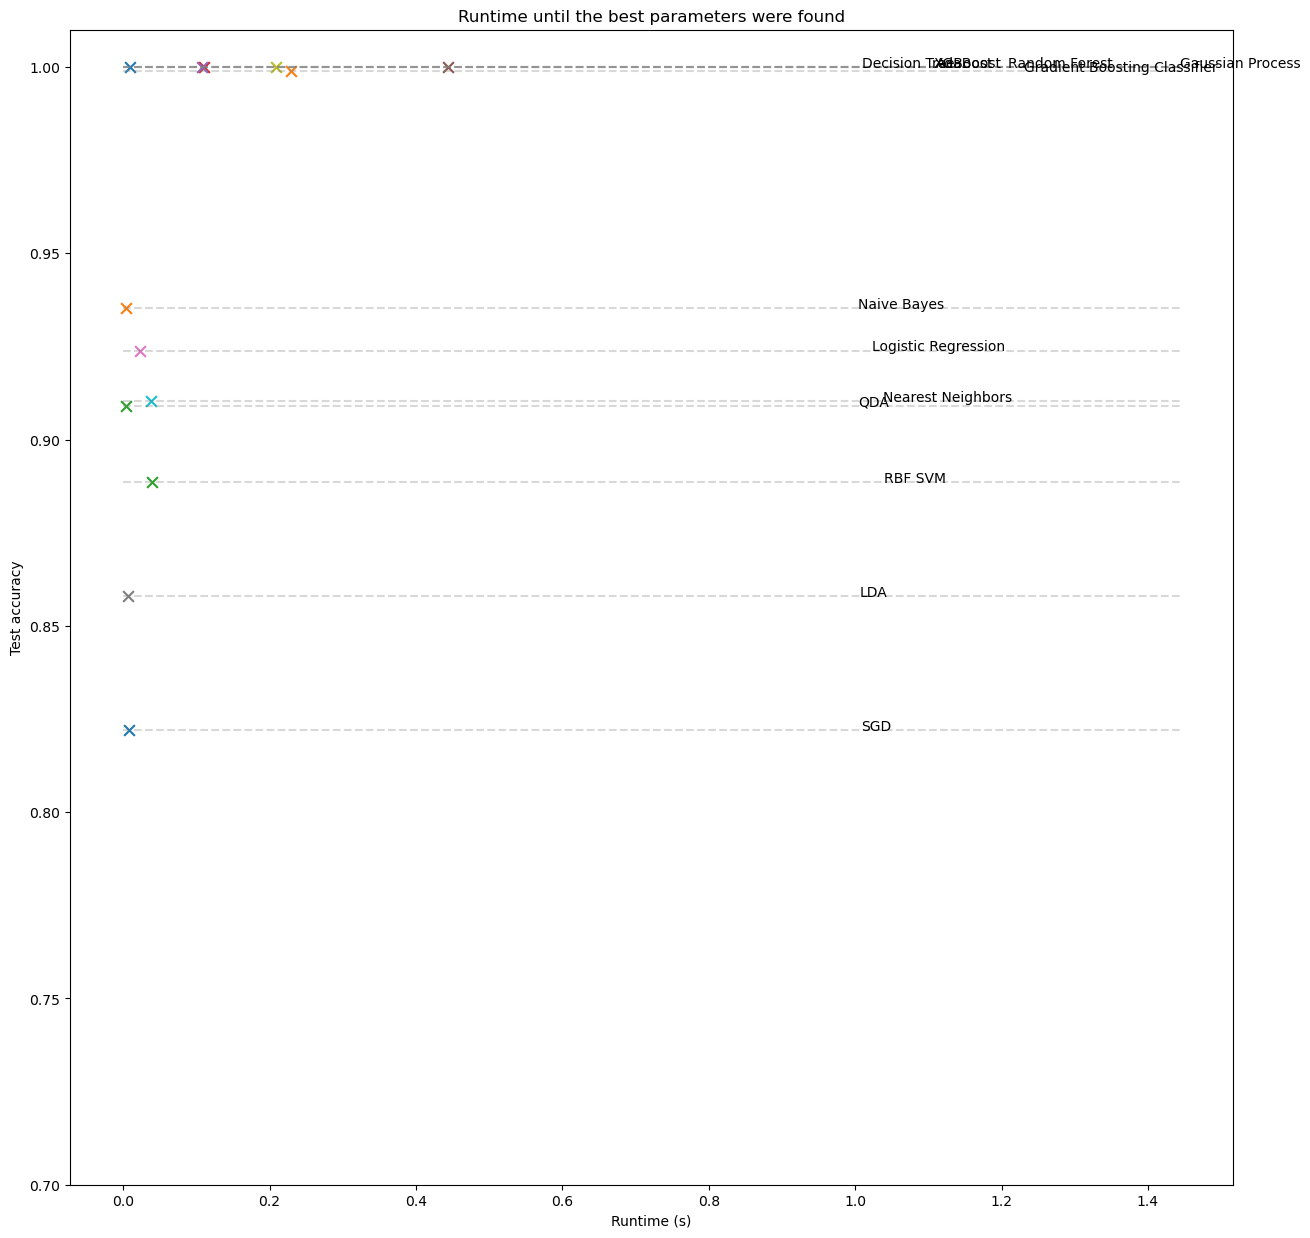

In [31]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Test accuracy')
plt.title('Runtime until the best parameters were found')
plt.show();

So, even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 